<div style="width: 100%; overflow: hidden;">
    <div style="width: 500px; float: left;"> 
        <h1>Ingenieurinformatik – Übung</h1>
        Lehrstuhl <b>Computational Civil Engineering</b><br>
        Kontakt: <a href = "mailto: cce-inginf@uni-wuppertal.de">Email senden</a> | Individuelle Kontakte siehe Webseite des Lehrstuhls<br>
        Links: 
        <a href="cce.uni-wuppertal.de/inginf">Vorlesungsskript</a> | 
        <a href="cce.uni-wuppertal.de/">Webseite des Lehrstuhls</a>
    </div>
    <div style="float:right;"> 
        <img src="logo_cce_combined.png" style="width:150px;"/>
    </div>
</div>

# Aufgabe 4.6 – Temperaturgleichung

Die Lösung einer gewöhnlichen Differentialgleichung, hier der Temperaturentwicklung, wird in dieser Aufgabe nochmals vorgestellt. Dabei wird die Gleichung erweitert und ein komplexer Quellterm implementiert. 

## Aufgabenteil A

In der Vorlesung wurde folgende Differentialgleichung vorgestellt. 

$$ \sf T'(t) = -(T-T_\infty) + Q(t) $$

Verwenden Sie die Funktion `scipy.integrate.solve_ivp` um die Gleichung für $\sf T_0 = 20$ mit $\sf T_\infty=10$ und $\sf Q=0$ zu lösen. Die Lösung soll bis $\sf t=25$ berechnet werden. Erstellen und beschriften Sie den Lösungsplot.

### Lösungshinweis

Die Ausgabe könnte wie folgt aussehen.

![](teil1.pdf)

### Lösungsvorschlag

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [2]:
# Rechte-Hand-Seite der Gleichung, hier mit Q=0
def f_T1(t, T):
    Tinfty = 10
    return -(T-Tinfty)

In [3]:
# Anfangswert der Lösung
T0 = 20

# Aufruf des Lösers
res1 = scipy.integrate.solve_ivp(f_T1, [0, 25], [T0])

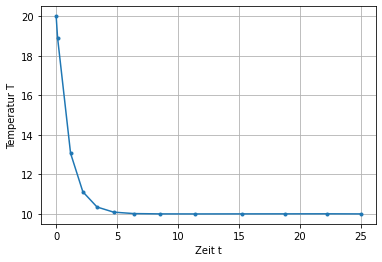

In [4]:
plt.plot(res1.t, res1.y[0], marker='.')
plt.xlabel("Zeit t")
plt.ylabel("Temperatur T")
plt.grid()

# Ausgabe für den Lösungshinweis
plt.savefig('teil1.pdf')

## Aufgabenteil B

Fügen Sie einen neuen Koeffizienten $\sf \beta$ als Vorfaktor vor den ersten Term auf der rechten Seite der Gleichung. Lösen Sie nun die Gleichung für $\sf \beta=0.2$. Stellen Sie graphisch die Lösungen mit und ohne das $\sf \beta$ in einer Graphik dar.

### Lösungshinweis

Die Ausgabe könnte wie folgt aussehen.

![](teil2.pdf)

### Lösungsvorschlag

In [5]:
def f_T2(t, T):
    Tinfty = 10
    beta = 0.2
    return -beta*(T-Tinfty)

In [6]:
T0 = 20
res2 = scipy.integrate.solve_ivp(f_T2, [0, 25], [T0])

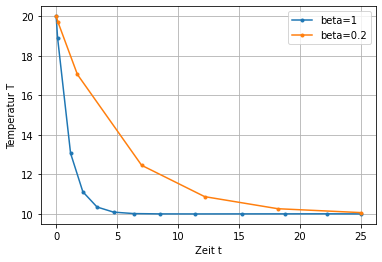

In [7]:
plt.plot(res1.t, res1.y[0], marker='.', label='beta=1')
plt.plot(res2.t, res2.y[0], marker='.', label='beta=0.2')

plt.xlabel("Zeit t")
plt.ylabel("Temperatur T")
plt.grid()
plt.legend()

# Ausgabe für den Lösungshinweis
plt.savefig('teil2.pdf')

## Aufgabenteil C

Nun wird der Quellterm $\sf Q(t)$ erweitert. Dieser soll für die Zeit zwischen 5 und 25 zwei volle Sinus-Schwingungen mit einer Amplitude von 10 durchführen, sonst ist er Null. Lösen Sie die Gleichung mit $\sf \beta=0.2$ bis zur Zeit $\sf t=50$. Stellen Sie neben der Lösung auch die Quelltermfunktion $\sf Q(t)$ in einer gemeinsamen Graphik dar.

### Lösungshinweis

Die Ausgabe könnte wie folgt aussehen.

![](teil3.pdf)

### Lösungsvorschlag

In [8]:
def f_Q(t):
    Q = 0
    if t >= 5 and t <= 25: 
        Q = 10 * np.sin((t-5)/20 * 4 * np.pi)
    return Q

In [9]:
def f_T3(t, T):
    Tinfty = 10
    return -0.2*(T-Tinfty) + f_Q(t)

In [10]:
T0 = 20
res3 = scipy.integrate.solve_ivp(f_T3, [0, 50], [T0])

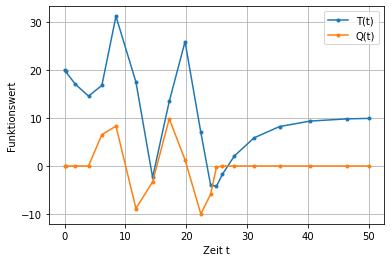

In [11]:
plt.plot(res3.t, res3.y[0], marker='.', label='T(t)')

Q = np.zeros_like(res3.t)
for i in range(len(Q)):
    Q[i] = f_Q(res3.t[i])
    
plt.plot(res3.t, Q, marker='.', label='Q(t)')

plt.xlabel("Zeit t")
plt.ylabel("Funktionswert")
plt.grid()
plt.legend()

# Ausgabe für den Lösungshinweis
plt.savefig('teil3.pdf')

## Aufgabenteil D

Die graphische Darstellung, siehe Lösungshinweis, deutet auf eine sehr sprunghafte Lösung. Verwenden Sie das optionale Argument `max_step` der Funktion `scipy.integrate.solve_ivp` um einen kleineren Zeitschritt, z.B. $\sf \Delta t=0.25$, zu wählen. Vergleichen Sie nun die beiden Lösungen.  

### Lösungshinweis

Die Ausgabe könnte wie folgt aussehen.

![](teil4.pdf)

### Lösungsvorschlag

In [12]:
T0 = 20
res4 = scipy.integrate.solve_ivp(f_T3, [0, 50], [T0], max_step=0.5)

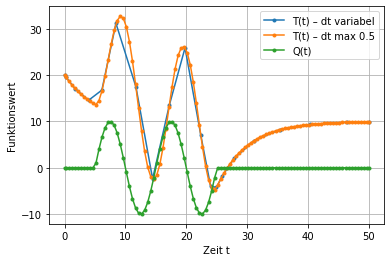

In [13]:
plt.plot(res3.t, res3.y[0], marker='.', label='T(t) – dt variabel')
plt.plot(res4.t, res4.y[0], marker='.', label='T(t) – dt max 0.5')

Q = np.zeros_like(res4.t)
for i in range(len(Q)):
    Q[i] = f_Q(res4.t[i])
    
plt.plot(res4.t, Q, marker='.', label='Q(t)')

plt.xlabel("Zeit t")
plt.ylabel("Funktionswert")
plt.grid()
plt.legend()

# Ausgabe für den Lösungshinweis
plt.savefig('teil4.pdf')